In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
df=pd.read_csv("European_Bank.csv")
#EDA
df.head()
df.isnull().sum()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,Year,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.0,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,2025.0,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,0.0,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,2025.0,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2025.0,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,2025.0,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,2025.0,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,2025.0,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [12]:
df['Exited'].value_counts(normalize=True)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

In [13]:
pd.crosstab(df['IsActiveMember'], df['Exited'], normalize='index')

Exited,0,1
IsActiveMember,,
0,0.731491,0.268509
1,0.857309,0.142691


In [14]:
df.groupby('NumOfProducts')['Exited'].mean()

NumOfProducts
1    0.277144
2    0.075817
3    0.827068
4    1.000000
Name: Exited, dtype: float64

In [15]:
median_balance = df['Balance'].median()

def engagement_profile(row):
    if row['IsActiveMember'] == 1 and row['NumOfProducts'] >= 2:
        return 'Active Engaged'
    elif row['IsActiveMember'] == 1 and row['NumOfProducts'] == 1:
        return 'Active Low Product'
    elif row['IsActiveMember'] == 0 and row['Balance'] > median_balance:
        return 'Inactive High Balance'
    else:
        return 'Inactive Disengaged'

df['EngagementProfile'] = df.apply(engagement_profile, axis=1)

In [17]:
df.groupby('EngagementProfile')['Exited'].mean()

EngagementProfile
Active Engaged           0.096600
Active Low Product       0.189231
Inactive Disengaged      0.212286
Inactive High Balance    0.323290
Name: Exited, dtype: float64

In [18]:
df['MultiProduct'] = np.where(df['NumOfProducts'] > 1, 'Multi', 'Single')
df.groupby('MultiProduct')['Exited'].mean()

MultiProduct
Multi     0.127746
Single    0.277144
Name: Exited, dtype: float64

In [21]:
df['RelationshipStrength'] = (
    df['IsActiveMember'] * 2 +
    df['NumOfProducts'] +
    df['HasCrCard']
)
df.groupby('RelationshipStrength')['Exited'].mean()

RelationshipStrength
1    0.345404
2    0.304598
3    0.150855
4    0.179517
5    0.077567
6    0.772727
7    1.000000
Name: Exited, dtype: float64

In [22]:
valid = df.groupby('RelationshipStrength').filter(lambda x: len(x) > 50)
valid.groupby('RelationshipStrength')['Exited'].mean()

RelationshipStrength
1    0.345404
2    0.304598
3    0.150855
4    0.179517
5    0.077567
6    0.772727
Name: Exited, dtype: float64

In [23]:
# Engagement Retention Ratio
engagement_retention = (
    df[df['IsActiveMember']==1]['Exited'].mean() /
    df[df['IsActiveMember']==0]['Exited'].mean()
)

# Product Depth Index
product_depth_index = (
    df[df['Exited']==0]['NumOfProducts'].mean() /
    df[df['Exited']==1]['NumOfProducts'].mean()
)

# Credit Card Stickiness
credit_card_stickiness = (
    df[df['HasCrCard']==0]['Exited'].mean() -
    df[df['HasCrCard']==1]['Exited'].mean()
)

engagement_retention, product_depth_index, credit_card_stickiness


(np.float64(0.5314188914147582),
 np.float64(1.046812765279016),
 np.float64(0.006306740995741661))

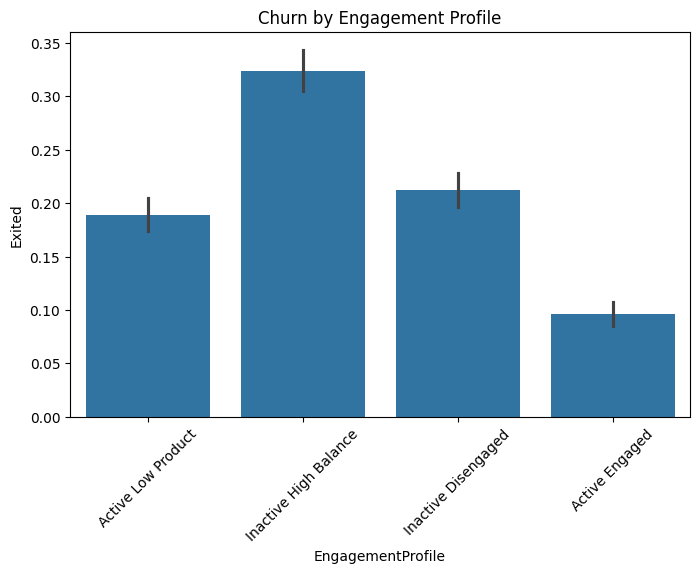

In [25]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.barplot(x='EngagementProfile', y='Exited', data=df)
plt.xticks(rotation=45)
plt.title("Churn by Engagement Profile")
plt.show()